In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
bike_data = pd.read_csv("bike_dataset.csv")
bike_data_clean = bike_data.dropna(subset=['selling_price', 'year'])

In [9]:
group_after_2015 = bike_data_clean[bike_data_clean['year'] > 2015]['selling_price']
group_before_2015 = bike_data_clean[bike_data_clean['year'] <= 2015]['selling_price']

mean_after_2015 = np.mean(group_after_2015)
mean_before_2015 = np.mean(group_before_2015)

std_after_2015 = np.std(group_after_2015, ddof=1)
std_before_2015 = np.std(group_before_2015, ddof=1)

n_after_2015 = len(group_after_2015)
n_before_2015 = len(group_before_2015)

In [13]:
z_score = (mean_after_2015 - mean_before_2015) / np.sqrt((std_after_2015**2 / n_after_2015) + (std_before_2015**2 / n_before_2015))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))


mean_after_2015 = float(mean_after_2015)
mean_before_2015 = float(mean_before_2015)
z_score = float(z_score)
p_value = float(p_value)
mean_after_2015, mean_before_2015, z_score, p_value

(84947.80869565217, 40266.36772046589, 13.26869064380394, 0.0)

In [14]:
print("This leads to the conclusion that the means of selling prices before and after 2015 are statistically significantly different.")

his leads to the conclusion that the means of selling prices before and after 2015 are statistically significantly different.


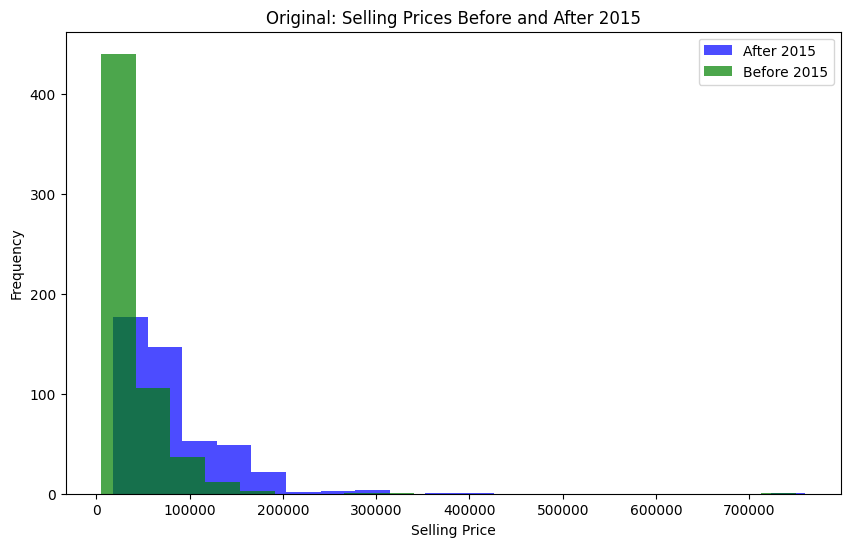

In [11]:
plt.figure(figsize=(10,6))
plt.hist(group_after_2015, bins=20, alpha=0.7, label="After 2015", color="blue")
plt.hist(group_before_2015, bins=20, alpha=0.7, label="Before 2015", color="green")
plt.title('Original: Selling Prices Before and After 2015')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [15]:
Q1 = bike_data_clean['selling_price'].quantile(0.25)
Q3 = bike_data_clean['selling_price'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bike_data_no_outliers = bike_data_clean[(bike_data_clean['selling_price'] >= lower_bound) & (bike_data_clean['selling_price'] <= upper_bound)]


In [21]:
group_after_2015_no_outliers = bike_data_no_outliers[bike_data_no_outliers['year'] > 2015]['selling_price']
group_before_2015_no_outliers = bike_data_no_outliers[bike_data_no_outliers['year'] <= 2015]['selling_price']

mean_after_2015_no_outliers = np.mean(group_after_2015_no_outliers)
mean_before_2015_no_outliers = np.mean(group_before_2015_no_outliers)

std_after_2015_no_outliers = np.std(group_after_2015_no_outliers, ddof=1)
std_before_2015_no_outliers = np.std(group_before_2015_no_outliers, ddof=1)

n_after_2015_no_outliers = len(group_after_2015_no_outliers)
n_before_2015_no_outliers = len(group_before_2015_no_outliers)

In [20]:
z_score_no_outliers = (mean_after_2015_no_outliers - mean_before_2015_no_outliers) / np.sqrt((std_after_2015_no_outliers**2 / n_after_2015_no_outliers) + (std_before_2015_no_outliers**2 / n_before_2015_no_outliers))
p_value_no_outliers = 2 * (1 - stats.norm.cdf(abs(z_score_no_outliers)))


mean_after_2015_no_outliers = float(mean_after_2015_no_outliers)
mean_before_2015_no_outliers = float(mean_before_2015_no_outliers)
z_score_no_outliers = float(z_score_no_outliers)
p_value_no_outliers = float(p_value_no_outliers)

mean_after_2015_no_outliers, mean_before_2015_no_outliers, z_score_no_outliers, p_value_no_outliers

(64455.476439790575, 36892.03885135135, 16.785884924165888, 0.0)